## Handwritten digits classification using neural network

<p> This project focuses on building a neural network to classify handwritten digits (0-9) from the MNIST dataset. The model is trained using a feedforward neural network, evaluated with a confusion matrix, and tuned for optimal accuracy. </p>

In [253]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

tf.random.set_seed(1234) # for consistent results

### Load Data

In [256]:
# Load teh dataset from MNIST
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [258]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


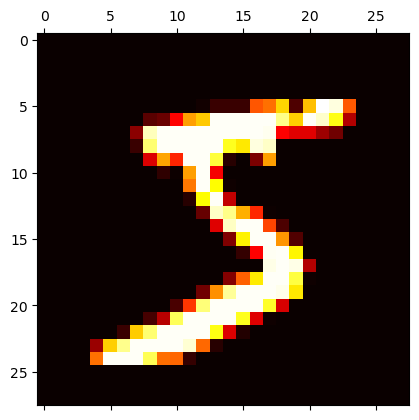

In [260]:
# visualize a  matrix
plt.matshow(X_train[0],cmap='hot') 

In [262]:
# Convert 28 by 28 image into 1-D array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [264]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [266]:
# X_test_flattened[0]

### Neural Network with One Layer and Sigmoid Activation

In [269]:
model = Sequential([
    tf.keras.Input(shape=(28*28,)),
    Dense(units=10, activation='sigmoid')    
])

In [271]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [273]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 228us/step - accuracy: 0.7684 - loss: 17.4216
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.8733 - loss: 6.4679
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.8810 - loss: 6.0212
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.8841 - loss: 5.7061
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.8832 - loss: 5.6051
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.8858 - loss: 5.4947
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.8853 - loss: 5.4848
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.8859 - loss: 5.4324
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.8883 - loss: 5.2809
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.8863 - loss: 5.3749


In [274]:
# Predict
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step


array([0.       , 0.       , 0.       , 1.       , 0.       , 0.3811541,
       0.       , 1.       , 1.       , 1.       ], dtype=float32)

In [275]:
np.argmax(y_predicted[0])

3

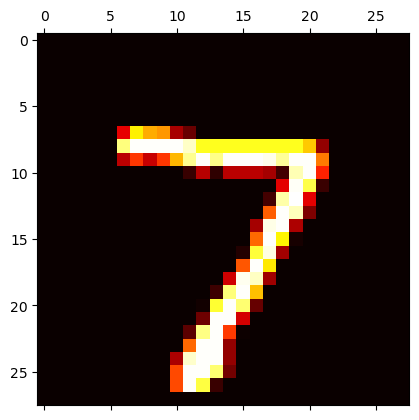

In [276]:
plt.matshow(X_test[0],cmap='hot') 

In [281]:
y_test[0]

7

<b>The model with 1 layer predicted wrong digit for above example. Lets build a confusion matrix to evaluate </b>

In [284]:
prediction_labels = [np.argmax(i) for i in y_predicted]

In [286]:
# Evaluate accuracy on test data set using Consfusion Matrix

def confusion_matrix(input):
    plt.figure(figsize = (10,7))
    sn.heatmap(input, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

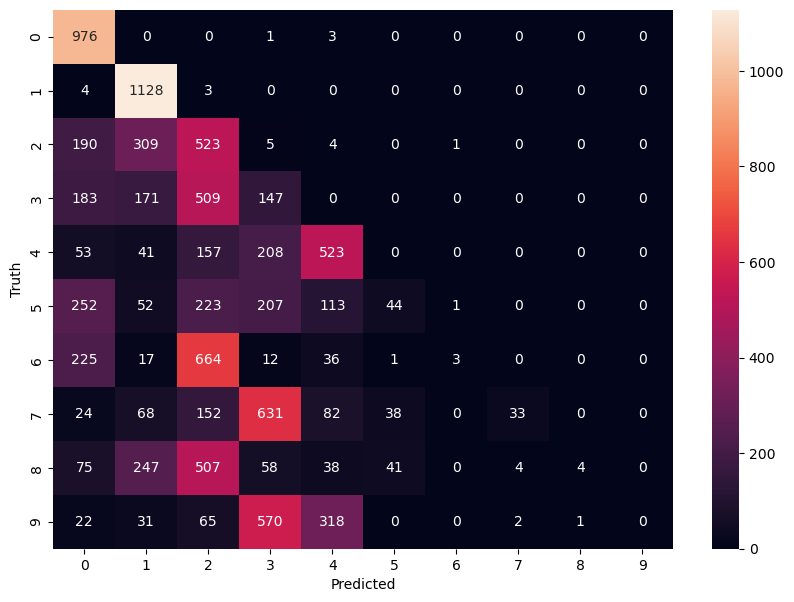

In [288]:
cm = tf.math.confusion_matrix(labels=y_test, predictions= prediction_labels)
confusion_matrix(cm)

<b>From the confusion matrix, it is evident that the model has predicted several incorrect values. To improve accuracy, we will apply Z-Score Normalization to rescale the input features. This technique will help standardize the data and potentially enhance the model's performance.</b>

### Rescaling the Input Using Z-Score Normalization

In [292]:
# Z-Score Normalized 

def normalization(input):
    mean = np.mean(input)
    std_dev = np.std(input)
    z_score_normalized = (input - mean) / std_dev
    return z_score_normalized

X_train_z_score_normalized = normalization(X_train_flattened)
X_test_z_score_normalized = normalization(X_test_flattened)

In [294]:
print(X_train_z_score_normalized.shape)

(60000, 784)


In [296]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.fit(X_train_z_score_normalized, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 220us/step - accuracy: 0.8976 - loss: 0.3635
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.9195 - loss: 0.2815
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.9216 - loss: 0.2756
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.9230 - loss: 0.2723
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.9236 - loss: 0.2700
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.9244 - loss: 0.2681
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.9251 - loss: 0.2666
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.9256 - loss: 0.2653
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.9260 - loss: 0.2642
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.9262 - loss: 0.2632


The accuracy is improved by 4.5% and loss function is reduced by 95.2%

In [299]:
# Predicted
prediction = model.predict(X_test_z_score_normalized)
(prediction[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


array([3.7424853e-01, 3.3653771e-07, 7.2095931e-01, 9.9996698e-01,
       9.6113563e-02, 9.6711773e-01, 2.5775731e-05, 1.0000000e+00,
       9.5629460e-01, 9.9873835e-01], dtype=float32)

In [301]:
y_test[0] # This shows that model has predicted correct digit  

7

In [303]:
# To verify precidect y_test and actual y_test
prediction_labels = [np.argmax(i) for i in prediction]
print(prediction_labels[:5])
print(y_test[:5])

[7, 2, 1, 0, 4]
[7 2 1 0 4]


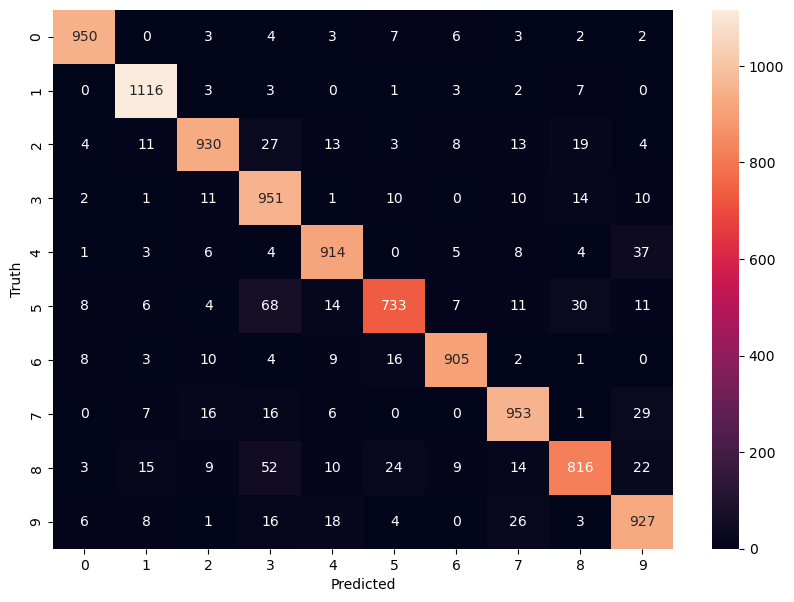

In [305]:
# Evaluate accuracy on test data set using Consfusion Matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions= prediction_labels)
confusion_matrix(cm)

The model has improved the accuracy. For further refinement we will add another layer and check the accuracy.

### Add One Hidden Layer to the Existing Model

In [309]:
model = Sequential([
    tf.keras.Input(shape=(28*28,)),
    Dense(units=25, activation='sigmoid'),
    Dense(units=10, activation='sigmoid') 
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.fit(X_train_z_score_normalized, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step - accuracy: 0.8082 - loss: 0.8336
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step - accuracy: 0.9243 - loss: 0.2704
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.9380 - loss: 0.2185
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 265us/step - accuracy: 0.9444 - loss: 0.1914
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step - accuracy: 0.9498 - loss: 0.1742
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - accuracy: 0.9537 - loss: 0.1617
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - accuracy: 0.9559 - loss: 0.1523
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.9579 - loss: 0.1447
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step - accuracy: 0.9591 - loss: 0.1382
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - accuracy: 0.9607 - loss: 0.1323


The accuracy of model has increased from 0.9262 to 0.9607 and minimized the Cost from loss: 0.2632 to loss: 0.1323

Now, let's change the activation function for the hidden layer and evaluate whether it improves the model's accuracy

### Change the Activation Function of the Hidden Layer to ReLU

In [314]:
model = Sequential([
    tf.keras.Input(shape=(28*28,)),
    Dense(units=25, activation='relu'),
    Dense(units=10, activation='sigmoid') 
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.fit(X_train_z_score_normalized, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 304us/step - accuracy: 0.8382 - loss: 0.5296
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 274us/step - accuracy: 0.9430 - loss: 0.1902
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 269us/step - accuracy: 0.9529 - loss: 0.1551
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.9583 - loss: 0.1359
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 270us/step - accuracy: 0.9626 - loss: 0.1232
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 270us/step - accuracy: 0.9656 - loss: 0.1141
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 275us/step - accuracy: 0.9676 - loss: 0.1067
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 274us/step - accuracy: 0.9692 - loss: 0.1004
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 269us/step - accuracy: 0.9713 - loss: 0.0940
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 273us/step - accuracy: 0.9730 - loss: 0.0884


The model showed improved accuracy when the ReLU activation function was used.

<b>We will now set the outer layer to linear activation and then apply softmax to get probabilities for our 0–9 digit classification. </b>
- Linear activation outputs raw logits (unscaled scores) for each class (digits 0–9).
- Softmax is applied separately to convert these logits into probabilities.

### Using Linear Activation and Applying Softmax Separately

In [319]:
model = Sequential([    
    tf.keras.Input(shape=(28*28,)),
    Dense(units=100, activation='relu'),
    Dense(units=10, activation='linear') 
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.fit(X_train_z_score_normalized, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8844 - loss: 0.3823
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.9641 - loss: 0.1152
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.9759 - loss: 0.0769
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.9816 - loss: 0.0571
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.9868 - loss: 0.0432
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.9882 - loss: 0.0357
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - accuracy: 0.9903 - loss: 0.0302
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.9914 - loss: 0.0266
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.9918 - loss: 0.0256
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - accuracy: 0.9917 - loss: 0.0242


#### Finally, the accuracy has improved to 99% and loss is minimized to 0.024

In [322]:
prediction = model.predict(X_test_z_score_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step


In [324]:
np.argmax(prediction[0])

7

In [326]:
# Apllied softmax

prediction_p = tf.nn.softmax(prediction)
prediction_p[5]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.9067034e-11, 9.9945211e-01, 2.8043984e-10, 7.6419648e-11,
       6.7636137e-08, 2.7570404e-11, 1.0033731e-12, 5.4785068e-04,
       1.5941666e-09, 9.4297790e-12], dtype=float32)>

In [328]:
np.argmax(prediction_p[0])

7

In [330]:
# It ensures the probabilities for all 10 classes sum to 1

np.sum(prediction_p[0])

1.0

In [332]:
prediction_labels = [np.argmax(i) for i in prediction]

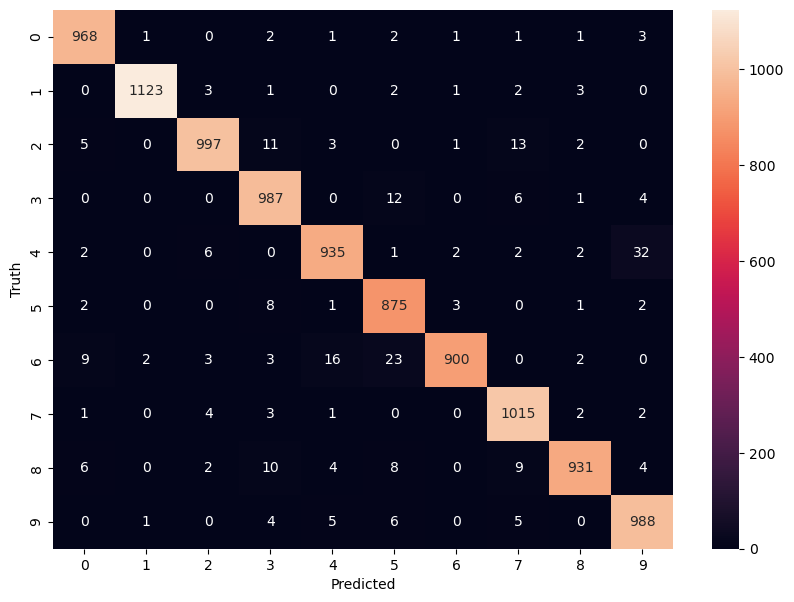

In [334]:
# Evaluate accuracy on test data set using Consfusion Matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions= prediction_labels)
confusion_matrix(cm)

## Conculsion:

<p> The neural network model successfully classifies handwritten digits with high accuracy of 99.20% on the test dataset. The use of ReLU activations in the hidden layers  has proven effective. The confusion matrix provides a deeper insight into the model's performance </p>